In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


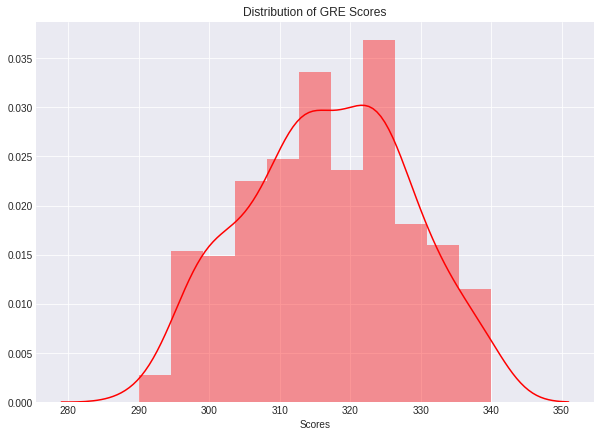

In [7]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(df['GRE Score'],kde=True,color='red')
plt.title('Distribution of GRE Scores')
plt.xlabel('Scores')
plt.show()

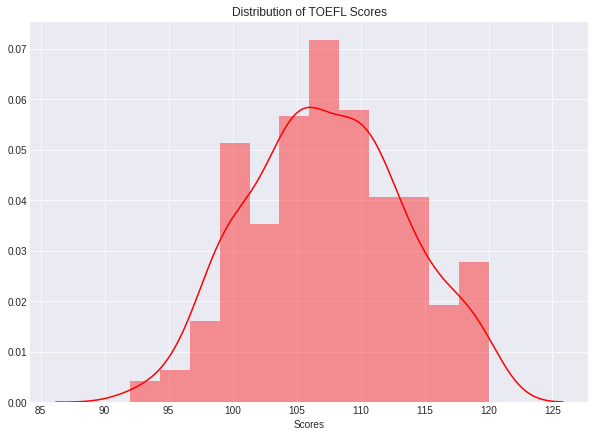

In [8]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(df['TOEFL Score'],kde=True,color='red')
plt.title('Distribution of TOEFL Scores')
plt.xlabel('Scores')
plt.show()

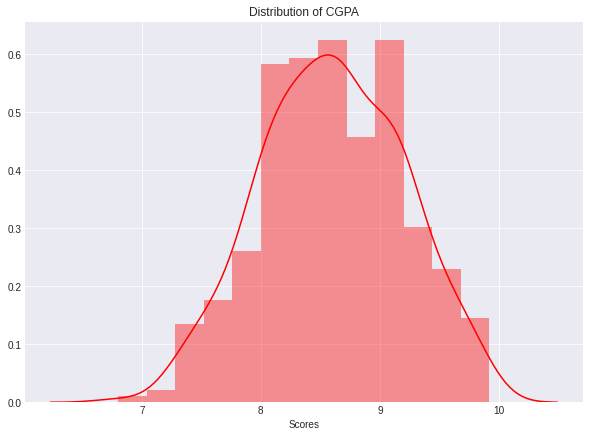

In [9]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,7))
sns.distplot(df['CGPA'],kde=True,color='red')
plt.title('Distribution of CGPA')
plt.xlabel('Scores')
plt.show()

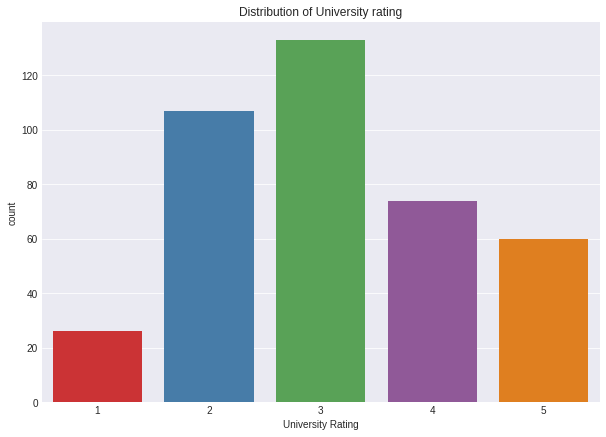

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(df['University Rating'],palette='Set1')
plt.xlabel('University Rating')
plt.title('Distribution of University rating')
plt.show()

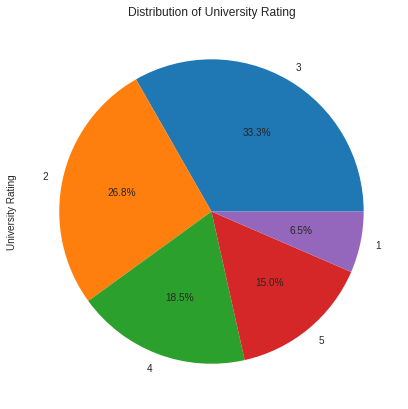

In [11]:
plt.title("Distribution of University Rating")
df['University Rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,7)) 
plt.show()

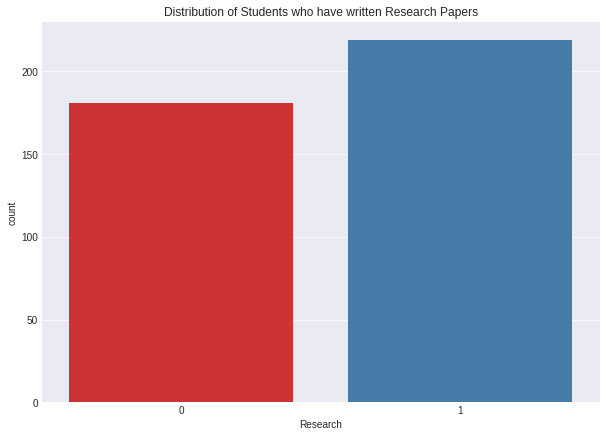

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(df['Research'],palette='Set1')
plt.xlabel('Research')
plt.title('Distribution of Students who have written Research Papers')
plt.show()

<Figure size 720x504 with 0 Axes>

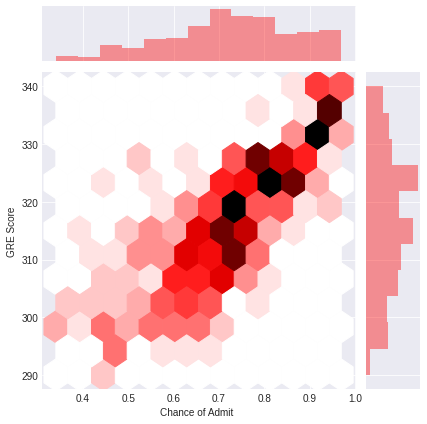

In [13]:
plt.figure(figsize=(10,7))
sns.jointplot(x="Chance of Admit ",y="GRE Score",data=df,kind="hex",color="red")
plt.show()

<Figure size 720x504 with 0 Axes>

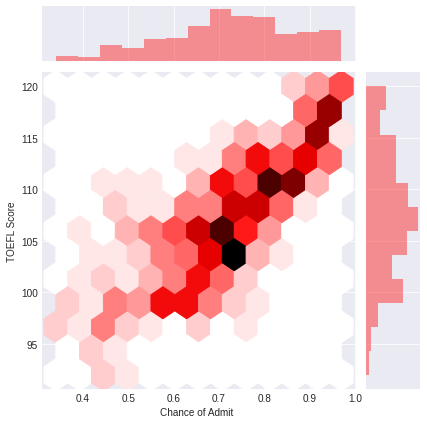

In [14]:
plt.figure(figsize=(10,7))
sns.jointplot(x="Chance of Admit ",y="TOEFL Score",data=df,kind="hex",color="red")
plt.show()

<Figure size 720x504 with 0 Axes>

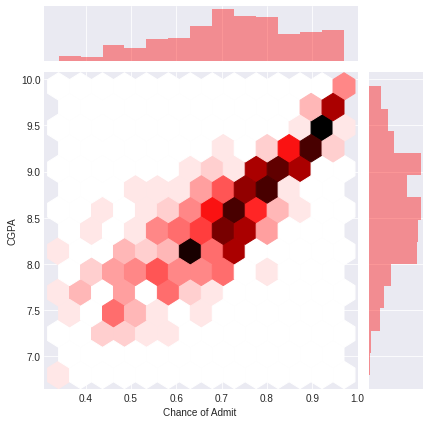

In [15]:
plt.figure(figsize=(10,7))
sns.jointplot(x="Chance of Admit ",y="CGPA",data=df,kind="hex",color="red")
plt.show()

In [16]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df[df['CGPA']>9.0][['GRE Score','TOEFL Score','University Rating','CGPA','Research','Chance of Admit ']].sort_values(by = 'CGPA',ascending = False).head(10)

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
143,340,120,4,9.92,1,0.97
202,340,120,5,9.91,1,0.97
203,334,120,5,9.87,1,0.97
385,335,117,5,9.82,1,0.96
34,331,112,5,9.80,1,0.94
148,339,116,4,9.80,1,0.96
24,336,119,5,9.80,1,0.97
213,333,119,5,9.78,1,0.96
130,339,114,5,9.76,1,0.96
71,336,112,5,9.76,1,0.96


In [18]:
df[df['GRE Score']>320][['GRE Score','TOEFL Score','University Rating','CGPA','Research','Chance of Admit ']].sort_values(by = 'CGPA',ascending = False).head(10)

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
143,340,120,4,9.92,1,0.97
202,340,120,5,9.91,1,0.97
203,334,120,5,9.87,1,0.97
385,335,117,5,9.82,1,0.96
24,336,119,5,9.80,1,0.97
34,331,112,5,9.80,1,0.94
148,339,116,4,9.80,1,0.96
213,333,119,5,9.78,1,0.96
71,336,112,5,9.76,1,0.96
130,339,114,5,9.76,1,0.96


In [19]:
df[df['TOEFL Score']>100][['GRE Score','TOEFL Score','University Rating','CGPA','Research','Chance of Admit ']].sort_values(by = 'CGPA',ascending = False).head(10)

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
143,340,120,4,9.92,1,0.97
202,340,120,5,9.91,1,0.97
203,334,120,5,9.87,1,0.97
385,335,117,5,9.82,1,0.96
34,331,112,5,9.80,1,0.94
148,339,116,4,9.80,1,0.96
24,336,119,5,9.80,1,0.97
213,333,119,5,9.78,1,0.96
130,339,114,5,9.76,1,0.96
71,336,112,5,9.76,1,0.96


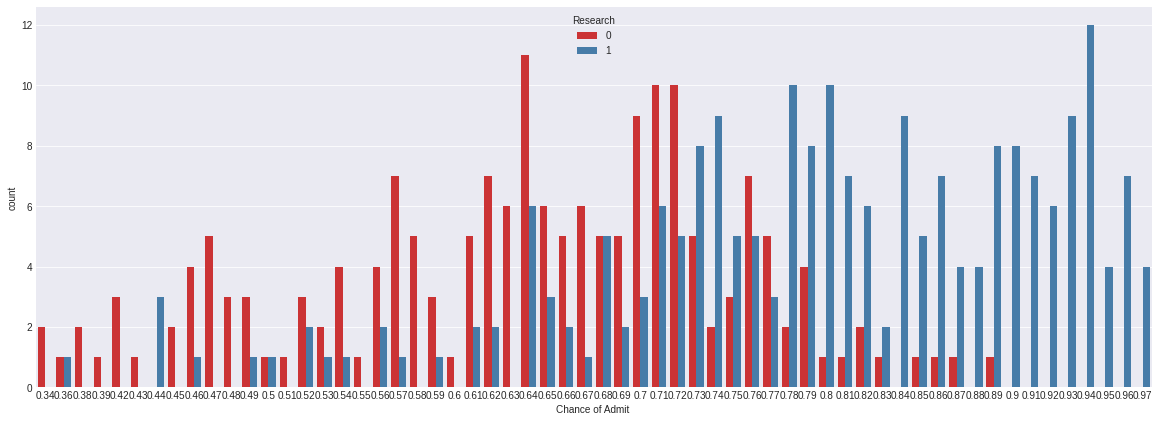

In [20]:
plt.figure(figsize=(20,7)) 
plot = sns.countplot(x='Chance of Admit ',data=df,hue='Research',palette="Set1")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [22]:
X = df[['CGPA','GRE Score','TOEFL Score','Research','University Rating']]
Y = df[['Chance of Admit ']]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X_train,Y_train)

LinearRegression()

In [26]:
pred = reg.predict(X_test)

In [27]:
mse=metrics.mean_squared_error(Y_test,pred)
mse

0.005115926455561129

In [28]:
X_test

,CGPA,GRE Score,TOEFL Score,Research,University Rating
132,8.56,309,105,0,5
309,8.60,308,110,0,4
341,8.76,326,110,1,3
196,8.26,306,105,0,2
246,8.73,316,105,0,3
...,...,...,...,...,...
14,8.20,311,104,1,3
363,8.36,306,103,0,2
304,8.43,313,106,0,2
361,9.54,334,116,1,4


In [29]:
Y_test

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
...,...
14,0.61
363,0.69
304,0.62
361,0.93


In [30]:
user_input = [[8.56,309,105,0,5]] #user input from testing data
user_pred = reg.predict(user_input)
print(user_pred)

[[0.70623199]]


In [31]:
user_input = [[9.54,334,116,1,4]] #user input from testing data
user_pred = reg.predict(user_input)
print((user_pred.flatten()*100).astype(float))

[92.27656667]


In [32]:
import pickle

In [33]:
pickle.dump(reg,open('new_model.pkl','wb'))